In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plotly Packages
from plotly import tools
!pip install chart_studio
import chart_studio.plotly as ply

 
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot#renderer framework

init_notebook_mode(connected=True)# to display figures in the notebook
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from pprint import pprint
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")


C:\Users\rajes\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#read real estate data set
df = pd.read_excel("dataset-1.xlsx")

In [3]:
df.shape

(414, 9)

In [4]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [5]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


# Data Cleaning

In [6]:
df.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

In [7]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

No null values in the data set

In [8]:
print(df.shape)
df.drop_duplicates()
df.shape

(414, 9)


(414, 9)

In [9]:
#dropping unnecessary "X1 transaction date" columns because we already have house age

df = df.drop(['Transaction date'], axis=1)

# Data Exploration

In [10]:
df.corr()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
House Age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


We can easily see that Target "Y house price of unit area" does not depend upon much on "house age". Also there is almost a zero correlation between target and number of bedrooms and house size feature.

It is corrleated to the location of the house(latitude and longitude) and number of convenience stores.

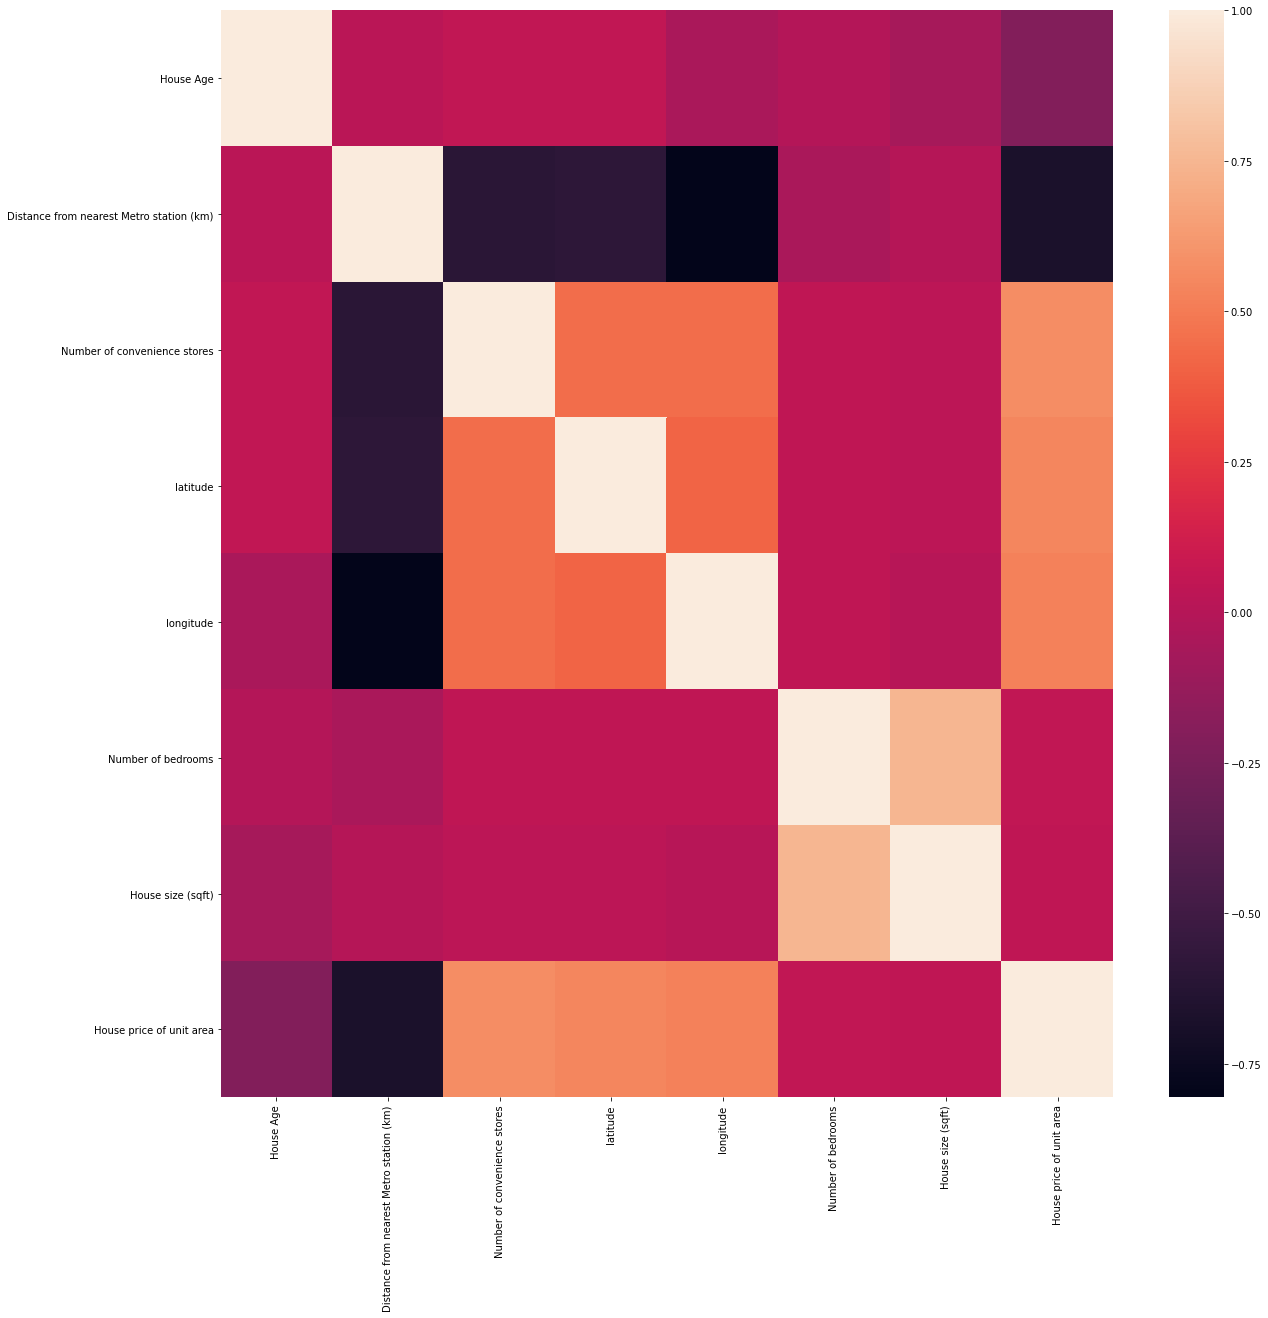

In [11]:
#Let's plot a heat map see what is going on

plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

Clearly, we can see the house price is positively correlated with number of convenience store and latitude and longitude.

# Removing Outliers

In [12]:
#first change these big column names

df.columns = ['house_age', 'nearest_MRT', 'convenience_stores', 'latitude', 'longitude','bedrooms','house_size', 'house_price']

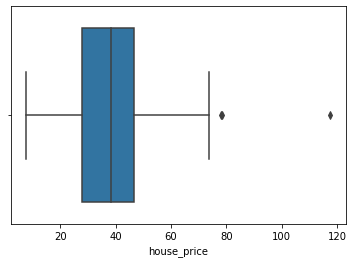

In [13]:
sns.boxplot(df.house_price)

In [14]:
df.house_price.sort_values(ascending=False).head()

270    117.5
220     78.3
312     78.0
166     73.6
105     71.0
Name: house_price, dtype: float64

In [15]:
df['house_price'].describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: house_price, dtype: float64

In [16]:
## Remove observations with house_price greater than 80.
df = df[df.house_price <= 80]
df.shape

(413, 8)

In [17]:
df.kurt()

house_age            -0.881056
nearest_MRT           3.193445
convenience_stores   -1.064560
latitude              0.262361
longitude             1.194639
bedrooms             -1.512117
house_size           -1.421163
house_price          -0.243291
dtype: float64

Kurtosis > 3 is said to be platykurtic. Here only the distance from the metro station is said to be platykuric and rest all are leptokurtic

In [18]:
df.skew()

house_age             0.379098
nearest_MRT           1.885365
convenience_stores    0.150203
latitude             -0.435341
longitude            -1.219649
bedrooms              0.022390
house_size           -0.109866
house_price           0.174349
dtype: float64

not much skewness visible in the dataset.

# Examining the Distributons and the Relationships

Text(0.5, 1.0, 'convenience_stores')

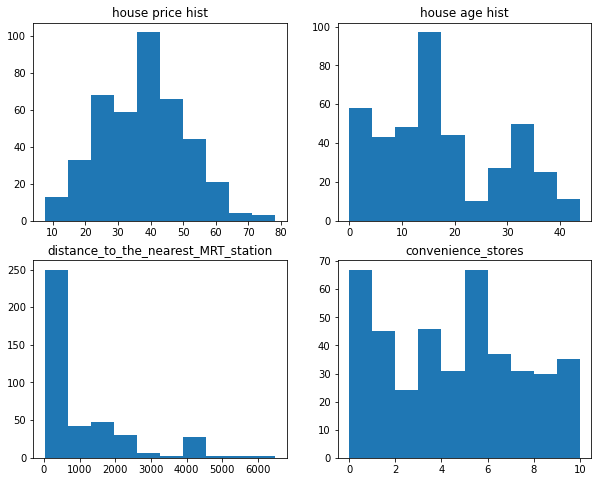

In [19]:
# visualise the distribution of continuous variables
plt.rcParams['figure.figsize'] = [10,8]
fig , axis = plt.subplots(2,2)
axis[0,0].hist(df.house_price)
axis[0,0].set_title('house price hist')
axis[0,1].hist(df.house_age)
axis[0,1].set_title('house age hist')
axis[1,0].hist(df.nearest_MRT)
axis[1,0].set_title('distance_to_the_nearest_MRT_station')
axis[1,1].hist(df.convenience_stores)
axis[1,1].set_title('convenience_stores')

House age varies from 0 to 43 years, with 3 peaks: 0-6 years,12-18 years, 30-36 years.
Most houses are located within 1 km of the nearest MRT station.From the above charts, it can be it can be assumed that variables house price, house age and number of convenient stores are symmetric and thus are normal. The variable distance from the nearest metro station seems to be positively skewed but can be standardised for our convenience.

In [20]:
# log transformation
nearest_MRT = np.log10(df.nearest_MRT)

(array([ 2.,  6., 27., 44., 77., 94., 39., 54., 34., 36.]),
 array([1.36889726, 1.61321876, 1.85754026, 2.10186175, 2.34618325,
        2.59050475, 2.83482625, 3.07914775, 3.32346925, 3.56779075,
        3.81211225]),
 <a list of 10 Patch objects>)

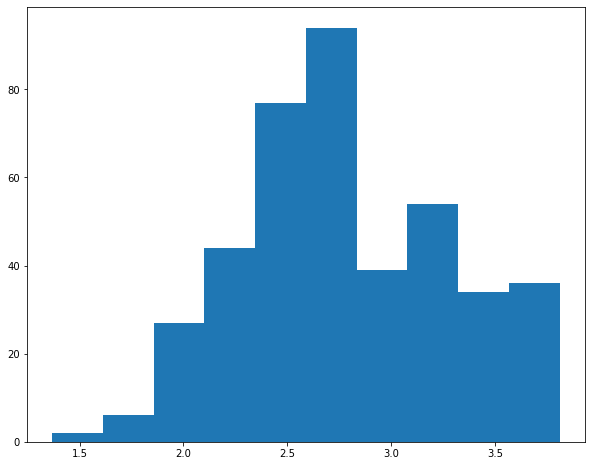

In [21]:
plt.hist(nearest_MRT)

From the above chart it can be drawn that the variable distance from the nearest metro station is standardised as it seems to be symmetric in nature.

In [22]:
# replacing earlier column with transformed one
df['nearest_MRT'] = nearest_MRT

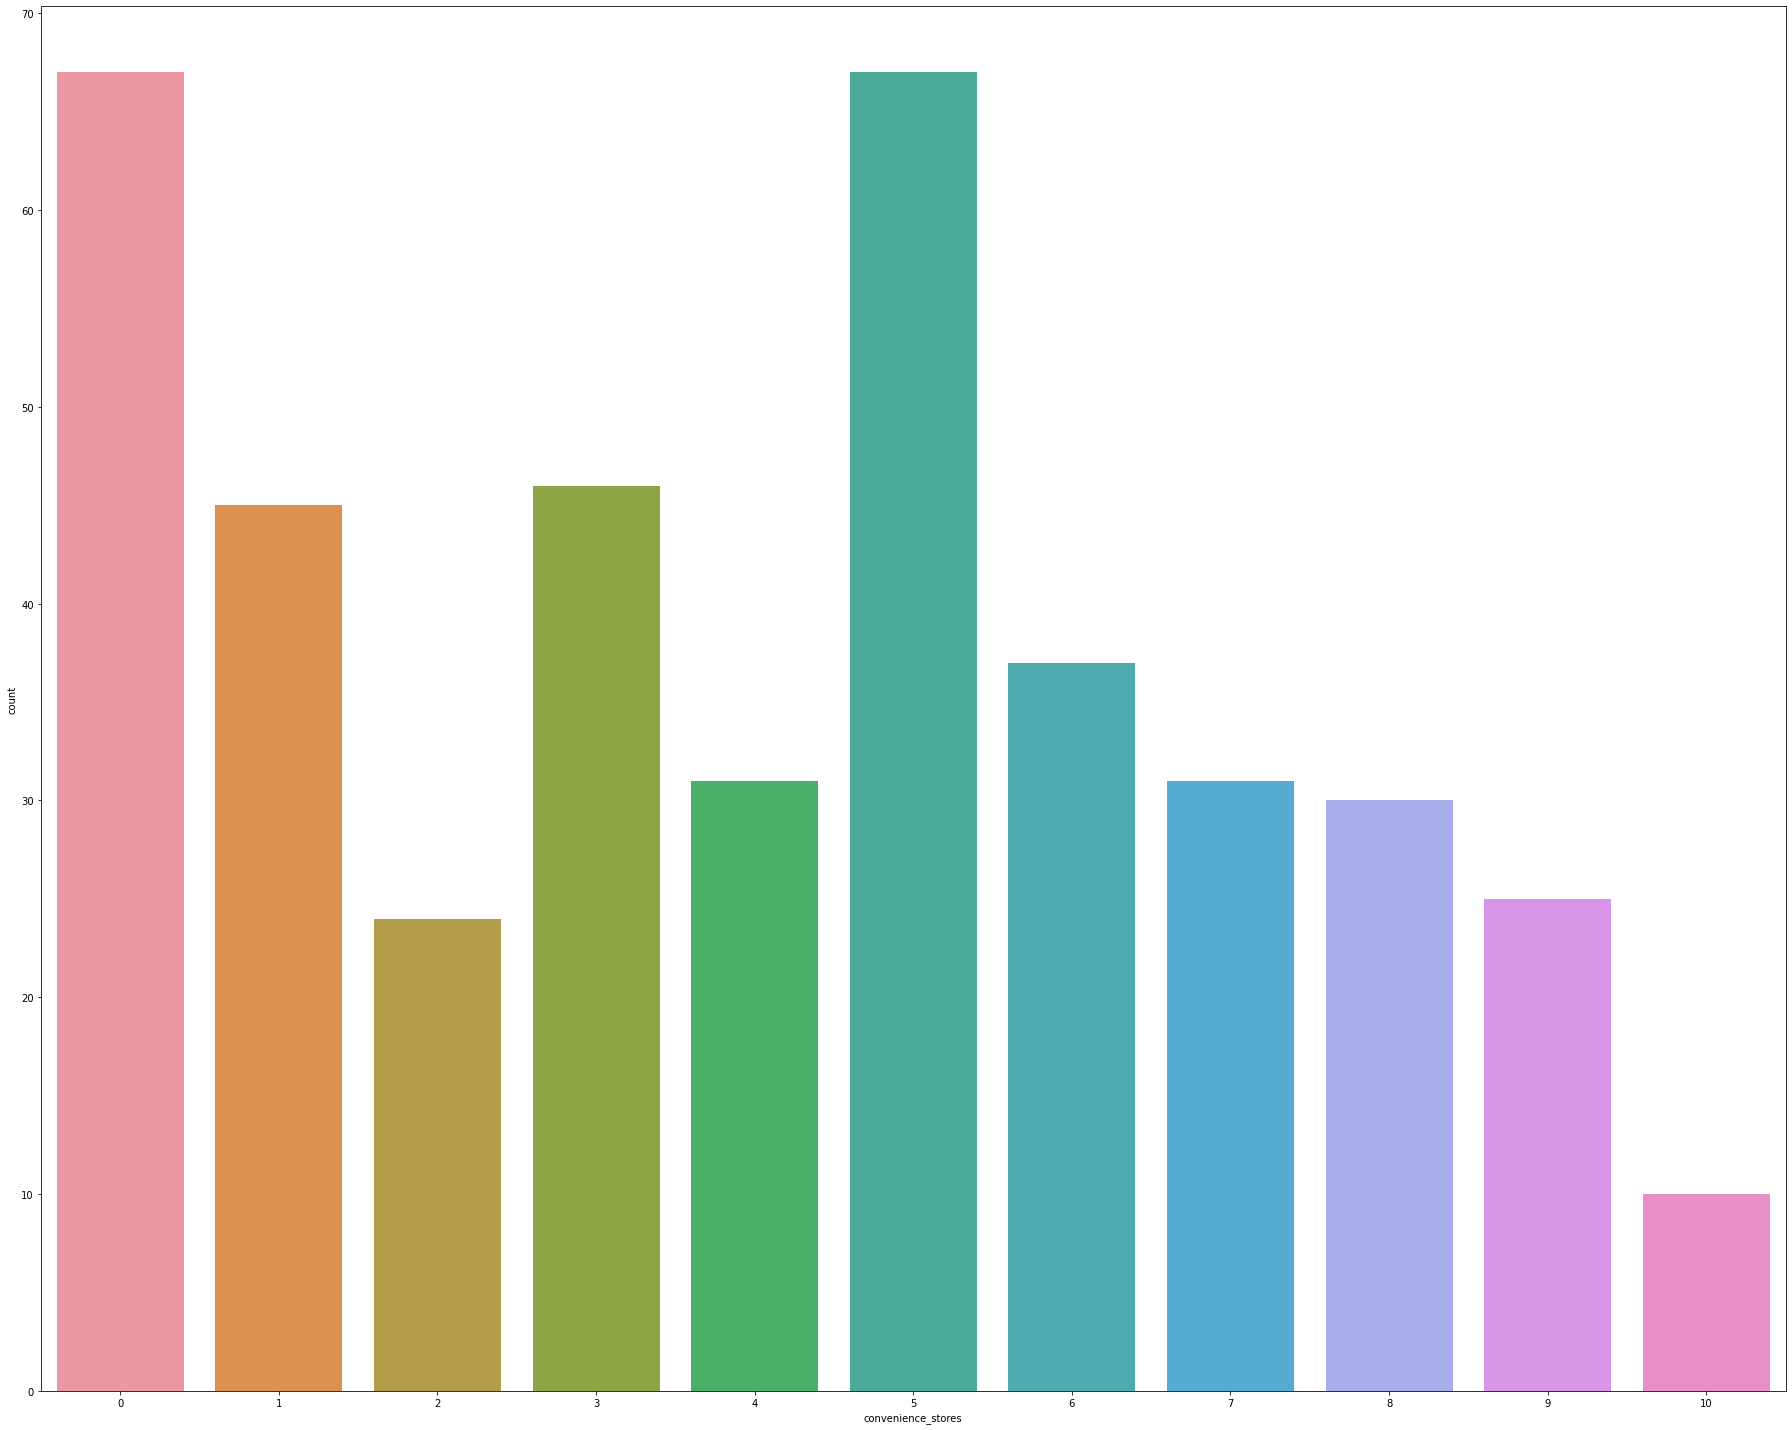

In [23]:
# visualise X4 number of convenience stores
sns.countplot(x = 'convenience_stores', data = df)
plt.tight_layout(rect=(0, 0, 2.5, 2.5)) 

Approximately 1 house in 6 does not have any convenience store in the living circle on foot. These houses are probably located in residential areas.
Half of the houses has between 1 and 6 convenience stores in the living circle on foot.

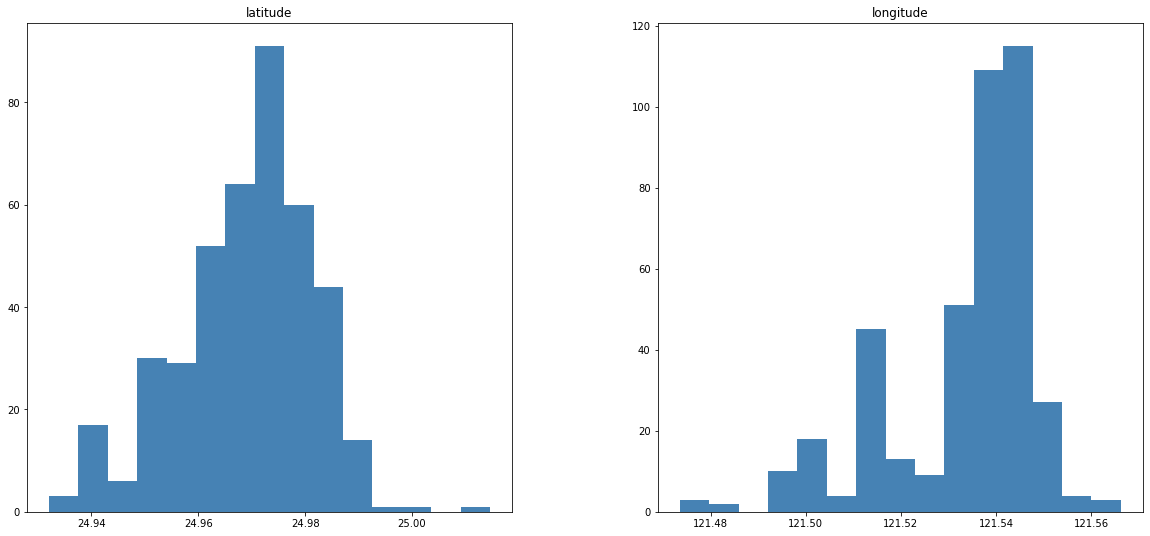

In [24]:
# visualise the distribution of latitude and longitude
fig = df[['latitude',
          'longitude',
          ]].hist(bins=15,
                 color='steelblue',
                 xlabelsize=10, ylabelsize=10,
                 figsize=(20,9),
                 grid=False)

Most of the houses are located in the East central part of the area within the extreme values of latitude and longitude of this dataset.

Text(0, 0.5, 'House Price')

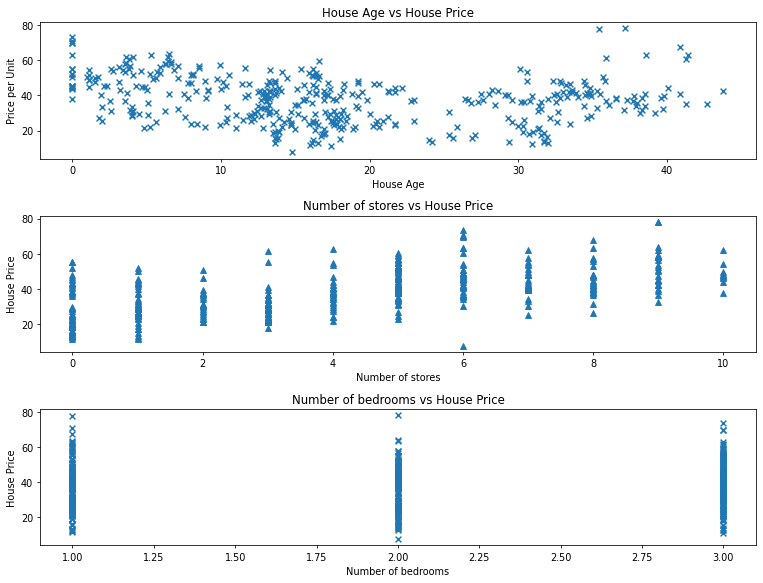

In [25]:
#Parameter of the graphs
fig = plt.figure(figsize=(11,8), dpi=70)
#House Age vs Price per Unit
plt.subplot(3,1,1)
x1 = df['house_age']
y = df['house_price'];
plt.scatter(x1,y,marker='x')
plt.title('House Age vs House Price');
plt.xlabel('House Age')
plt.ylabel('Price per Unit')
plt.tight_layout()
#Stores vs Price per Unit
plt.subplot(3,1,2)
x2 = df['convenience_stores']
y = df['house_price'];
plt.scatter(x2,y, marker='^')
plt.title('Number of stores vs House Price');
plt.xlabel('Number of stores')
plt.ylabel('House Price')
plt.tight_layout()
#Nbr of bedrooms vs Price per Unit
plt.subplot(3,1,3)
x4 = df['bedrooms']
y = df['house_price'];
plt.scatter(x4,y, marker='x')
plt.title('Number of bedrooms vs House Price');
plt.xlabel('Number of bedrooms')
plt.ylabel('House Price')

There is no much pattern that can be explained from this scatter plot no clear discrimination of target happening with these 3 features.

Text(0, 0.5, 'House Price')

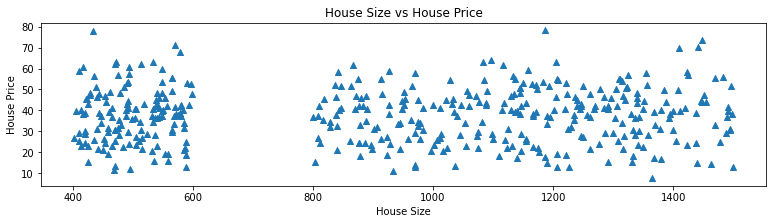

In [26]:
#lets explore the relation between house size vs house price 
fig = plt.figure(figsize=(13,3)) 
#Data Gathering
x3 = df['house_size']
y = df['house_price']
plt.scatter(x3,y, marker='^')   #Data points
plt.title('House Size vs House Price');
plt.xlabel('House Size')
plt.ylabel('House Price')

It implies house size has  almost no effect on the price of houses.

Text(0, 0.5, 'House Price')

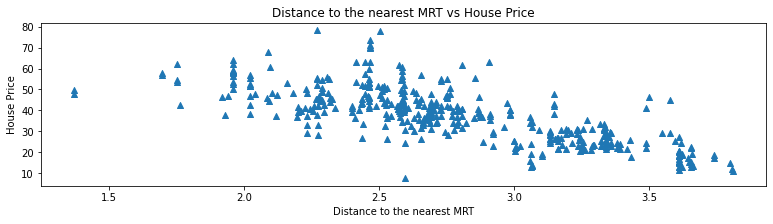

In [27]:
#lets explore the relation between distance from the nearest metro station vs house price 
#Distance to the nearest MRT station vs Price per Unit
fig = plt.figure(figsize=(13,3)) 
#Data Gathering
x3 = df['nearest_MRT']
y = df['house_price']
plt.scatter(x3,y, marker='^')   #Data points
plt.title('Distance to the nearest MRT vs House Price');
plt.xlabel('Distance to the nearest MRT')
plt.ylabel('House Price')

Looking at the figure, it looks like more the house is near to the MRT station, the house price tends to be higher. This figure, shows a certain relationship between the distance to the nearest MRT station and the house price.So this feature gives us a clear discriminative feature for the target.So this is a relevant feature.

In [28]:
#library to convert latitude and longitude values
from scipy.cluster.vq import kmeans2, whiten

# Feature Engineering

In [29]:
#Add attribute Region based on latitude and longitude values
np.random.seed(12345678)
coordinates = np.array(df[['latitude','longitude']])


x,df['Region'] = kmeans2(whiten(coordinates), 4, iter = 20,) 
df['Region'].loc[df['Region']==0]='Region0'
df['Region'].loc[df['Region']==1]='Region1'
df['Region'].loc[df['Region']==2]='Region2'
df['Region'].loc[df['Region']==3]='Region3'

In [30]:
df['convenience_stores'].value_counts()

5     67
0     67
3     46
1     45
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: convenience_stores, dtype: int64

In [31]:
#A new categorical variable store_cat is added based on the number of Nearby Stores
df['store_cat']=np.nan


for homes in [df]:
    homes.loc[homes['convenience_stores'] <5,'store_cat'] = 'Less'
    homes.loc[homes['convenience_stores'] >=5,'store_cat']='More'

In [32]:
#New categorical variable age_cat is added as 'NewHome' <15 years, 'MiddleAgedHome' between 15 to 25,
#'OldHome' > 25 based on age of the house
df['house_age_cat']=np.nan


for homes in [df]:
    homes.loc[homes['house_age'] <15,'house_age_cat'] = 'New Home'
    homes.loc[(homes['house_age'] >=15) &(homes['house_age'] <30),'house_age_cat']='Middle Aged Home'
    homes.loc[homes['house_age'] >=30,'house_age_cat']='OldHome'

In [33]:
df.head()

,house_age,nearest_MRT,convenience_stores,latitude,longitude,bedrooms,house_size,house_price,Region,store_cat,house_age_cat
0,32.0,1.928799,10,24.98298,121.54024,1,575,37.9,Region2,More,OldHome
1,19.5,2.486565,9,24.98034,121.53951,2,1240,42.2,Region2,More,Middle Aged Home
2,13.3,2.749724,5,24.98746,121.54391,3,1060,47.3,Region2,More,New Home
3,13.3,2.749724,5,24.98746,121.54391,2,875,54.8,Region2,More,New Home
4,5.0,2.591697,5,24.97937,121.54245,1,491,43.1,Region2,More,New Home


In [34]:
#Does  the number of convenince stores depends on region
stores_r0 = df['convenience_stores'].loc[df['Region']=='Region0'].values
stores_r1 = df['convenience_stores'].loc[df['Region']=='Region1'].values
stores_r2 = df['convenience_stores'].loc[df['Region']=='Region2'].values
stores_r3 = df['convenience_stores'].loc[df['Region']=='Region3'].values


In [35]:
trace0 = go.Box(
    y=stores_r0,
    name = 'region 0',
    boxmean= True,
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=stores_r1,
    name = 'region 1',
    boxmean= True,
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=stores_r2,
    name = 'region 2',
    boxmean= True,
    marker = dict(
        color = 'rgb(247, 186, 166)',
    )
)

trace3 = go.Box(
    y=stores_r3,
    name = 'region 3',
    boxmean= True,
    marker = dict(
        color = 'rgb(247, 186, 166)',
    )
)
data = [trace0, trace1, trace2,trace3]
layout = go.Layout(title="Convenience Stores <br> by region", xaxis=dict(title="Region", titlefont=dict(size=16)),
                  yaxis=dict(title="Stores", titlefont=dict(size=16)))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

It is observed that number of stores are higher in Region 2 and Region 3. Region 0 and Region 1 have houses with zero stores nearby.

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


lm = ols("convenience_stores ~ Region", data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:     convenience_stores   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     36.18
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           9.34e-21
Time:                        07:19:46   Log-Likelihood:                -983.03
No. Observations:                 413   AIC:                             1974.
Df Residuals:                     409   BIC:                             1990.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.9231      0.36

The p-value less than 0.05 indicates that there is a significant relationship between region and the stores in the vicinity of homes.

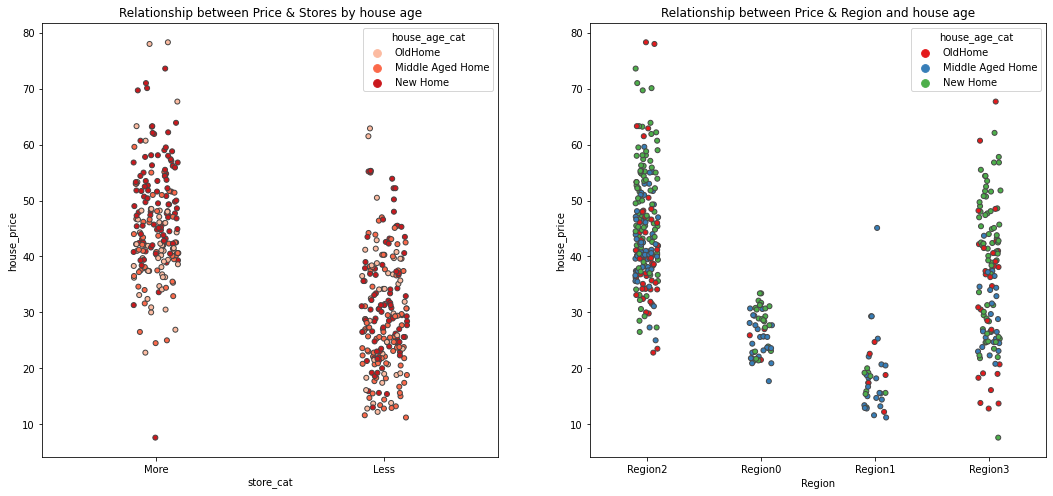

In [37]:
# Create subpplots
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8))


sns.stripplot(x="store_cat", y="house_price", hue="house_age_cat",data=df, ax=ax1, linewidth=1, palette="Reds")
ax1.set_title("Relationship between Price & Stores by house age")

sns.stripplot(x="Region", y="house_price", hue="house_age_cat", data=df, ax=ax2, linewidth=1, palette="Set1")
ax2.set_title("Relationship between Price & Region and house age")

plt.show() 

It is observed that prices tend to be higher when more stores are available. Homes in Region2 and Region3 have higher prices than those in Region0 and Region2. Let us determine if more stores are in region 2 and Region 3.

In [38]:
fig = ff.create_facet_grid(
    df,
    x='convenience_stores',
    y='house_price',
    color_name='Region',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'Region0': 'rgb(255, 0, 0)', 'Region1': 'rgb(0, 255, 0)',
             'Region2': 'rgb(0, 0, 255)','Region3':'rgb(255,255,255)'}
)
251, 232, 238


fig['layout'].update(title="Price vs Stores by Region", width=800, height=600, plot_bgcolor='rgb(251, 251, 251)', 
                     paper_bgcolor='rgb(255, 255, 255)')


iplot(fig, filename='facet - custom colormap')

The Facet Grid of Prices vs Stores by Region shows that more stores are available in Region2 and Region3.

In [39]:
#Region2 and Region 3 distributions 
price_r3_more=df.loc[(df['Region']=='Region3') & (df['store_cat'] == 'More'),'house_price']
price_r3_less=df.loc[(df['Region']=='Region3') & (df['store_cat'] == 'Less'),'house_price']

price_r2_more=df.loc[(df['Region']=='Region2') & (df['store_cat'] == 'More'),'house_price']
price_r2_less=df.loc[(df['Region']=='Region2') & (df['store_cat'] == 'Less'),'house_price']

In [40]:
trace0 = go.Box(y=price_r3_more,
               name='Region3 with More Stores',
               marker=dict(color='#3D9970'))

trace1 = go.Box(y=price_r3_less,
               name='Region3 with Less Stores',
               marker=dict(color='#FF4136'))

trace2 = go.Box(y=price_r2_more,
               name='Region2 with More Stores',
               marker=dict(color='#1121F8'))


trace3 = go.Box(y=price_r2_less,
               name='Region2 with Less Stores',
               marker=dict(color='#C362C2'))

fig = go.Figure()

fig.add_trace(trace0)
fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)

fig.update_layout(title='Deeper Look Into region 2 and Region 3 Prices',
                  xaxis=dict(title='Stores'),
                   yaxis= dict(title='Price Per unit Area'))
fig.show()

Region2 with More stores have a higher price than Region3 with more stores. Region2 with less stores have a higher price than region 2 with less stores. In general Region2 have more prices than region3.

In [41]:
r3_more_stores= df.loc[(df['Region']=='Region3') & (df['store_cat'] == 'More')]
r3_less_stores = df.loc[(df['Region']=='Region3') & (df['store_cat'] == 'Less')]

trace0 = go.Scatter(
    y=r3_more_stores['house_price'],
    x=r3_more_stores['house_age'],
    name='More Stores',
    mode='markers',
    marker=dict(size=10,
                color='#DF0101')
)
trace1 = go.Scatter(
    y=r3_less_stores['house_price'],
    x=r3_less_stores['house_age'],
    name='Less Stores',
    mode='markers',
    marker=dict(size=10,
                color='#00FF40')
)
data=[trace0, trace1]

layout=dict(
    title='Influence of Nearby Stores in Home Price in Region 3',
    yaxis=dict(zeroline=False,
              title='Price Per Unit Area',
              titlefont=dict(
                  size=16)
              ),
    xaxis=dict(zeroline=False,
              title='Age of the House',
              titlefont=dict(
                  size=16)
              )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

It is observed that in region3 for houses of all agess, houses with more nearby stores have a higher price than houses with less nearby stores.

In [42]:
r2_more_stores= df.loc[(df['Region']=='Region2') & (df['store_cat'] == 'More')]
r2_less_stores = df.loc[(df['Region']=='Region2') & (df['store_cat'] == 'Less')]

trace0 = go.Scatter(
    y=r2_more_stores['house_price'],
    x=r2_more_stores['house_age'],
    name='More Stores',
    mode='markers',
    marker=dict(size=10,
                color='#DF0101')
)
trace1 = go.Scatter(
    y=r2_less_stores['house_price'],
    x=r2_less_stores['house_age'],
    name='Less Stores',
    mode='markers',
    marker=dict(size=10,
                color='#00FF40')
)

data=[trace0, trace1]

layout=dict(
    title='Influence of Nearby Stores in Home Price in Region 2',
    yaxis=dict(zeroline=False,
              title='Price Per Unit Area',
              titlefont=dict(
                  size=16)
              ),
    xaxis=dict(zeroline=False,
              title='Age of the House',
              titlefont=dict(
                  size=16)
              )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

It is observed that house prices in region2 is generally more for houses where stores are more for homes of all ages.

After analysing the visualisations we can infer that combined effect of region and store category is significant on the target value. so we can combine those two features.

In [43]:
df["region_store_cat"] = (df['Region'].astype(str) + "_"
                           + df['store_cat'].astype(str) )

In [44]:
df.head()

,house_age,nearest_MRT,convenience_stores,latitude,longitude,bedrooms,house_size,house_price,Region,store_cat,house_age_cat,region_store_cat
0,32.0,1.928799,10,24.98298,121.54024,1,575,37.9,Region2,More,OldHome,Region2_More
1,19.5,2.486565,9,24.98034,121.53951,2,1240,42.2,Region2,More,Middle Aged Home,Region2_More
2,13.3,2.749724,5,24.98746,121.54391,3,1060,47.3,Region2,More,New Home,Region2_More
3,13.3,2.749724,5,24.98746,121.54391,2,875,54.8,Region2,More,New Home,Region2_More
4,5.0,2.591697,5,24.97937,121.54245,1,491,43.1,Region2,More,New Home,Region2_More


In [45]:
# remove individual features that are combined together
df = df.drop(['Region','store_cat','house_age_cat'], axis=1)

In [46]:
df.columns

Index(['house_age', 'nearest_MRT', 'convenience_stores', 'latitude',
       'longitude', 'bedrooms', 'house_size', 'house_price',
       'region_store_cat'],
      dtype='object')

In [47]:
column_to_move = df.pop("house_price")

# insert column with insert(location, column_name, column_value)

df.insert(8, "house_price", column_to_move)

In [48]:
df.head()

,house_age,nearest_MRT,convenience_stores,latitude,longitude,bedrooms,house_size,region_store_cat,house_price
0,32.0,1.928799,10,24.98298,121.54024,1,575,Region2_More,37.9
1,19.5,2.486565,9,24.98034,121.53951,2,1240,Region2_More,42.2
2,13.3,2.749724,5,24.98746,121.54391,3,1060,Region2_More,47.3
3,13.3,2.749724,5,24.98746,121.54391,2,875,Region2_More,54.8
4,5.0,2.591697,5,24.97937,121.54245,1,491,Region2_More,43.1


In [49]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,house_age,nearest_MRT,convenience_stores,latitude,longitude,bedrooms,house_size,house_price,region_store_cat_Region1_Less,region_store_cat_Region2_Less,region_store_cat_Region2_More,region_store_cat_Region3_Less,region_store_cat_Region3_More
0,32.0,1.928799,10,24.98298,121.54024,1,575,37.9,0,0,1,0,0
1,19.5,2.486565,9,24.98034,121.53951,2,1240,42.2,0,0,1,0,0
2,13.3,2.749724,5,24.98746,121.54391,3,1060,47.3,0,0,1,0,0
3,13.3,2.749724,5,24.98746,121.54391,2,875,54.8,0,0,1,0,0
4,5.0,2.591697,5,24.97937,121.54245,1,491,43.1,0,0,1,0,0


# Building the Machine Learning Model

In [50]:
# In this section we will preprocess our data
# First we should split our original data.

from sklearn.model_selection import train_test_split,KFold,cross_val_score

# Shuffle our dataset before splitting
np.random.seed(42)
df = df.sample(frac=1, random_state=1)

X = df.drop(columns={'house_price'}, axis=1)
y = df["house_price"]

# Split into both training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [51]:
## Create a Random Forest Regressor object 
rf_regressor = RandomForestRegressor()

## fit the object on the train set
rf_regressor.fit(X_train, y_train)

print('Random Forest Parameters:\n')
pprint(rf_regressor.get_params())

Random Forest Parameters:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [52]:
y_pred = rf_regressor.predict(X_test)

In [53]:
actual_predicted_df = pd.concat([pd.DataFrame(y_test).reset_index(), pd.DataFrame(y_pred)], axis=1).\
                            rename(columns={"house_price":"actual_house_price", 0:"predicted_house_price"})
actual_predicted_df.head()

,index,actual_house_price,predicted_house_price
0,358,45.1,50.282
1,265,38.1,40.600
2,237,39.0,39.603
3,283,23.5,31.258
4,378,37.4,35.197


In [54]:
# Define a function for model evaluation using cross validation
def evaluate_model_cross_validation(name, model, X_train, y_train, folds = 10):
 
    # MAE (Mean Absolute Error)
    metric='neg_mean_absolute_error'
    scores = cross_val_score(rf_regressor, X_train, y_train, scoring=metric, cv=folds, n_jobs=-1)
    mean_score, std_score = np.mean(scores), np.std(scores)
    print('>%s - train set - MAE: %.3f (+/-%.3f)' % (name, mean_score, std_score))
    
    
    # MSE (Mean Squared Error)
    metric='neg_mean_squared_error'
    scores = cross_val_score(rf_regressor, X_train, y_train, scoring=metric, cv=folds, n_jobs=-1)
    mean_score, std_score = np.mean(scores), np.std(scores)
    print('>%s - train set - MSE: %.3f (+/-%.3f)' % (name, mean_score, std_score))
    
    # R^2 (R-Squared)
    metric='r2'
    scores = cross_val_score(rf_regressor, X_train, y_train, scoring=metric, cv=folds, n_jobs=-1)
    mean_score, std_score = np.mean(scores), np.std(scores)
    print('>%s - train set - R^2: %.3f (+/-%.3f)' % (name, mean_score, std_score))

In [55]:
def evaluate_model_on_test_set(name, model, y_test, y_predicted):
    print('>%s - test set - MAE: %.3f' % (name, mean_absolute_error(y_test, y_predicted)))
    print('>%s - test set - MSE: %.3f' % (name, mean_squared_error(y_test, y_predicted)))
    print('>%s - test set - R^2: %.3f' % (name, r2_score(y_test, y_predicted)))

In [56]:
evaluate_model_cross_validation("RF_baseline_model", rf_regressor, X_train, y_train, 10)

>RF_baseline_model - train set - MAE: -4.815 (+/-0.857)
>RF_baseline_model - train set - MSE: -43.691 (+/-20.200)
>RF_baseline_model - train set - R^2: 0.735 (+/-0.096)


In [57]:
evaluate_model_on_test_set("RF_baseline_model", rf_regressor, y_test, y_pred)

>RF_baseline_model - test set - MAE: 4.768
>RF_baseline_model - test set - MSE: 48.420
>RF_baseline_model - test set - R^2: 0.719


In [58]:
#Ridge regression
params_rid ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params_rid ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [59]:
y_test =ridge_regressor.predict(X_test) ##Predict test result

In [60]:
evaluate_model_cross_validation("Ridge_reg_model", ridge_regressor, X_train, y_train, 10)

>Ridge_reg_model - train set - MAE: -4.884 (+/-0.829)
>Ridge_reg_model - train set - MSE: -43.786 (+/-18.936)
>Ridge_reg_model - train set - R^2: 0.733 (+/-0.098)


In [61]:
evaluate_model_on_test_set("Ridge_reg_model", ridge_regressor, y_test, y_pred)

>Ridge_reg_model - test set - MAE: 2.915
>Ridge_reg_model - test set - MSE: 15.139
>Ridge_reg_model - test set - R^2: 0.885


In [66]:
#Lasso
param_lasso ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), param_lasso ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(X_train ,y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [67]:
y_test =lasso_regressor.predict(X_test) ##Predict test result

In [68]:
evaluate_model_cross_validation("Lasso_reg_model", lasso_regressor, X_train, y_train, 10)

>Lasso_reg_model - train set - MAE: -4.793 (+/-0.846)
>Lasso_reg_model - train set - MSE: -42.462 (+/-18.483)
>Lasso_reg_model - train set - R^2: 0.730 (+/-0.090)


In [69]:
evaluate_model_on_test_set("Lasso_reg_model", lasso_regressor, y_test, y_pred)

>Lasso_reg_model - test set - MAE: 3.030
>Lasso_reg_model - test set - MSE: 16.175
>Lasso_reg_model - test set - R^2: 0.874


In [70]:
#Bagging Regressor
param_BR =   {'n_estimators':[100,350,500,750]}
bagging_regressor = GridSearchCV(BaggingRegressor(), param_BR, cv =10, scoring = 'neg_mean_squared_error')
bagging_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(),
             param_grid={'n_estimators': [100, 350, 500, 750]},
             scoring='neg_mean_squared_error')

In [72]:
y_test =bagging_regressor.predict(X_test) ##Predict test result

In [73]:
evaluate_model_cross_validation("Bagging_reg_model", bagging_regressor, X_train, y_train, 10)

>Bagging_reg_model - train set - MAE: -4.859 (+/-0.824)
>Bagging_reg_model - train set - MSE: -43.766 (+/-19.370)
>Bagging_reg_model - train set - R^2: 0.741 (+/-0.098)


In [74]:
evaluate_model_on_test_set("Bagging_reg_model", bagging_regressor, y_test, y_pred)

>Bagging_reg_model - test set - MAE: 0.470
>Bagging_reg_model - test set - MSE: 0.419
>Bagging_reg_model - test set - R^2: 0.997


In [75]:
#Extra Trees Regressor
param_ETR =  {'n_estimators': [100,300,500,800,100], 'bootstrap': [True,False], 'max_features': ['sqrt','log2']}
ET_regressor = GridSearchCV(ExtraTreesRegressor(), param_ETR, cv =10, scoring = 'neg_mean_squared_error')
ET_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 300, 500, 800, 100]},
             scoring='neg_mean_squared_error')

In [76]:
y_test =ET_regressor.predict(X_test) ##Predict test result

In [77]:
evaluate_model_cross_validation("ET_reg_model", ET_regressor, X_train, y_train, 10)

>ET_reg_model - train set - MAE: -4.858 (+/-0.861)
>ET_reg_model - train set - MSE: -43.744 (+/-18.896)
>ET_reg_model - train set - R^2: 0.737 (+/-0.095)


In [78]:
evaluate_model_on_test_set("ET_reg_model", ET_regressor, y_test, y_pred)

>ET_reg_model - test set - MAE: 2.021
>ET_reg_model - test set - MSE: 7.588
>ET_reg_model - test set - R^2: 0.939


In [79]:
#HistgradientBoosting
param_HGBR = {'loss': ['squared_error', 'absolute_error', 'poisson'], 'learning_rate': [0.2,0.5,0.8,1]}
HGB_regressor = GridSearchCV(HistGradientBoostingRegressor(), param_HGBR, cv =10, scoring = 'neg_mean_squared_error')
HGB_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=HistGradientBoostingRegressor(),
             param_grid={'learning_rate': [0.2, 0.5, 0.8, 1],
                         'loss': ['squared_error', 'absolute_error',
                                  'poisson']},
             scoring='neg_mean_squared_error')

In [80]:
y_test =HGB_regressor.predict(X_test) ##Predict test result

In [81]:
evaluate_model_cross_validation("HGB_reg_model", HGB_regressor, X_train, y_train, 10)

>HGB_reg_model - train set - MAE: -4.803 (+/-0.816)
>HGB_reg_model - train set - MSE: -43.974 (+/-19.123)
>HGB_reg_model - train set - R^2: 0.736 (+/-0.102)


In [82]:
evaluate_model_on_test_set("HGB_reg_model", HGB_regressor, y_test, y_pred)

>HGB_reg_model - test set - MAE: 2.304
>HGB_reg_model - test set - MSE: 8.525
>HGB_reg_model - test set - R^2: 0.940


Bagging Regressor, Histgradient Regressor and ExtraTrees Regressor gives us the better fit as well as high generalization power with Rsquare above 0.9. Comparing all the models there is no chance of overfitting.

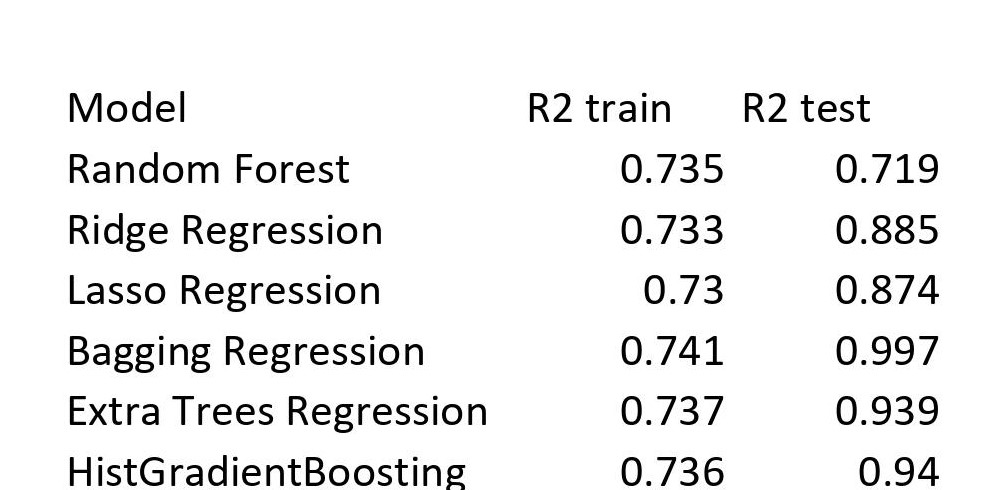

# Assumptions of Models:

Random Forest:No formal distributional assumptions, random forests are non-parametric and can thus handle skewed and multi-modal data as well as categorical data that are ordinal or non-ordinal.

Ridge/ Lasso Regression: The assumptions of ridge regression are the same as that of linear regression: linearity, constant variance, and independence. However, as ridge regression does not provide confidence limits, the distribution of errors to be normal need not be assumed.

Bagging Regression: can be used as dependent model to boost the performance and reduce the variance. Highly accurate Model which reduces the variance without increasing the bias.

Extra Trees Regression:  Extra Trees differs from Random Forest, however, in the fact that it uses the whole original sample as opposed to subsampling the data with replacement as Random Forest does. Another difference is in how the nodes are split. While Random Forest is built to always choose the best possible split, Extra Trees chooses random splits. Here that randomness worked and we got a better accuracy.

HistGradientBoosting Regressor: It is based on the assumption that the best next model minimizes the total prediction error when merged with past models. 